In [31]:
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
#!pip install mahotas
#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

#--------------------
# tunable-parameters
#--------------------
images_per_class = 80
fixed_size       = tuple((227, 227))
data_dir = 'dogs/working/resized'
output_dir = 'dogs/output/skmodel_feateng'
train_path       = f"{data_dir}/train"
test_path       = f"{data_dir}/test"
h5_data_train          = f'{output_dir}/data_train.h5'
h5_labels_train        = f'{output_dir}/labels_train.h5'
h5_data_test          = f'{output_dir}/data_test.h5'
h5_labels_test        = f'{output_dir}/labels_test.h5'
bins             = 8

Import Data

In [ ]:
# Get Training Data
train_df = pd.read_csv(data_dir+'/train_labels_top20.csv')

# Get Test Data
test_df = pd.read_csv(data_dir+'/test_labels_top20.csv')

In [34]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [42]:
# get the training labels
train_labels = list(set(train_df.label_name.values))

# get the training labels
test_labels = list(set(test_df.label_name.values))

# sort the training labels
train_labels.sort()
print(train_labels)
test_labels.sort()
print(test_labels)

# empty lists to hold feature vectors and labels
global_features_train = []
labels_train          = []

# empty lists to hold feature vectors and labels
global_features_test = []
labels_test          = []

['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02086910-papillon', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02086910-papillon', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']


In [43]:
# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    train_dir = os.path.join(train_path, training_name)
    test_dir = os.path.join(test_path, training_name)
    
    # get the current training label
    current_label = training_name


    # Process training directory
    images = os.listdir(train_dir)
    
    # print(len(images))
    for img in images:

        # # get the image file name
        file = train_dir + "/" + img 

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
        # image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels_train.append(current_label)
        global_features_train.append(global_feature)

    print("[STATUS] training processed folder: {}".format(current_label))

    # Process test directory
    #list images in the directory
    images = os.listdir(test_dir)
    
    # print(len(images))
    for img in images:

        # # get the image file name
        file = test_dir + "/" + img 

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
        # image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels_test.append(current_label)
        global_features_test.append(global_feature)

    print("[STATUS] test processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")


[STATUS] training processed folder: n02085936-Maltese_dog
[STATUS] test processed folder: n02085936-Maltese_dog
[STATUS] training processed folder: n02086240-Shih-Tzu
[STATUS] test processed folder: n02086240-Shih-Tzu
[STATUS] training processed folder: n02086910-papillon
[STATUS] test processed folder: n02086910-papillon
[STATUS] training processed folder: n02088094-Afghan_hound
[STATUS] test processed folder: n02088094-Afghan_hound
[STATUS] training processed folder: n02090721-Irish_wolfhound
[STATUS] test processed folder: n02090721-Irish_wolfhound
[STATUS] training processed folder: n02091831-Saluki
[STATUS] test processed folder: n02091831-Saluki
[STATUS] training processed folder: n02092002-Scottish_deerhound
[STATUS] test processed folder: n02092002-Scottish_deerhound
[STATUS] training processed folder: n02095889-Sealyham_terrier
[STATUS] test processed folder: n02095889-Sealyham_terrier
[STATUS] training processed folder: n02096051-Airedale
[STATUS] test processed folder: n0209

In [47]:
# get the overall feature vector size
print("[STATUS] train feature vector size {}".format(np.array(global_features_train).shape))
print("[STATUS] test feature vector size {}".format(np.array(global_features_test).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels_train).shape))
print("[STATUS] test Labels {}".format(np.array(labels_test).shape))

# encode the target labels
targetNames = np.unique(labels_train)
le          = LabelEncoder()
le.fit(labels_train)
target_train      =  le.transform(labels_train)
target_test      = le.transform(labels_test)

print("[STATUS] training labels encoded...")
print("[STATUS] testing labels encoded...")

# scale features in the range (0-1)
scaler  = MinMaxScaler(feature_range=(0, 1))
rescaled_features_train = scaler.fit_transform(global_features_train)
rescaled_features_test = scaler.fit_transform(global_features_test)
print("[STATUS] feature vector normalized...")

print("[STATUS] train target labels: {}".format(target_train))
print("[STATUS] train target labels shape: {}".format(target_train.shape))

print("[STATUS] test target labels: {}".format(target_test))
print("[STATUS] test target labels shape: {}".format(target_test.shape))

# save the feature vector using HDF5
h5f_data_train = h5py.File(h5_data_train, 'w')
h5f_data_train.create_dataset('dataset_1', data=np.array(rescaled_features_train))

h5f_data_test = h5py.File(h5_data_test, 'w')
h5f_data_test.create_dataset('dataset_1', data=np.array(rescaled_features_test))


h5f_label_train = h5py.File(h5_labels_train, 'w')
h5f_label_train.create_dataset('dataset_1', data=np.array(target_train))

h5f_label_test = h5py.File(h5_labels_test, 'w')
h5f_label_test.create_dataset('dataset_1', data=np.array(target_test))

h5f_data_train.close()
h5f_label_train.close()
h5f_data_test.close()
h5f_label_test.close()


print("[STATUS] end of training..")

[STATUS] train feature vector size (3417, 532)
[STATUS] test feature vector size (825, 532)
[STATUS] training Labels (3417,)
[STATUS] test Labels (825,)
[STATUS] training labels encoded...
[STATUS] testing labels encoded...
[STATUS] feature vector normalized...
[STATUS] train target labels: [ 0  0  0 ... 19 19 19]
[STATUS] train target labels shape: (3417,)
[STATUS] test target labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4

In [62]:
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.externals import joblib

warnings.filterwarnings('ignore')

#--------------------
# tunable-parameters
#--------------------
num_trees = 100
# test_size = 0.10
seed      = 123

scoring    = "accuracy"

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))
models.append(('NN', MLPClassifier(random_state=seed)))

# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data_train  = h5py.File(h5_data_train, 'r')
h5f_label_train = h5py.File(h5_labels_train, 'r')

global_features_string_train = h5f_data_train['dataset_1']
global_labels_string_train   = h5f_label_train['dataset_1']

global_features_train = np.array(global_features_string_train)
global_labels_train   = np.array(global_labels_string_train)

h5f_data_train.close()
h5f_label_train.close()

# import the feature vector and trained labels
h5f_data_test  = h5py.File(h5_data_test, 'r')
h5f_label_test = h5py.File(h5_labels_test, 'r')

global_features_string_test = h5f_data_test['dataset_1']
global_labels_string_test   = h5f_label_test['dataset_1']

global_features_test = np.array(global_features_string_test)
global_labels_test   = np.array(global_labels_string_test)

h5f_data_test.close()
h5f_label_test.close()


# verify the shape of the feature vector and labels
print("[STATUS] train features shape: {}".format(global_features_train.shape))
print("[STATUS] train labels shape: {}".format(global_labels_train.shape))
print("[STATUS] test features shape: {}".format(global_features_test.shape))
print("[STATUS] test labels shape: {}".format(global_labels_test.shape))

print("[STATUS] training started...")

[STATUS] train features shape: (3417, 532)
[STATUS] train labels shape: (3417,)
[STATUS] test features shape: (825, 532)
[STATUS] test labels shape: (825,)
[STATUS] training started...


In [63]:
# split the training and testing data
# (trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
#                                                                                           np.array(global_labels),
#                                                                                           test_size=test_size,
#                                                                                           random_state=seed)

trainDataGlobal = np.array(global_features_train)
testDataGlobal = np.array(global_features_train)
trainLabelsGlobal = np.array(global_labels_train)
testLabelsGlobal = np.array(global_labels_test)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (3417, 532)
Test data   : (3417, 532)
Train labels: (3417,)
Test labels : (825,)


LR: 0.268655 (0.015656)
Time to Train 4.0636138916015625
LDA: 0.250804 (0.020138)
Time to Train 1.7693469524383545
KNN: 0.221246 (0.024796)
Time to Train 0.3256559371948242
CART: 0.171196 (0.012613)
Time to Train 5.75219202041626
RF: 0.323382 (0.024644)
Time to Train 19.1474769115448
NB: 0.134036 (0.022222)
Time to Train 0.25522899627685547
SVM: 0.278031 (0.019810)
Time to Train 19.33765196800232
NN: 0.283874 (0.024712)
Time to Train 42.89018392562866


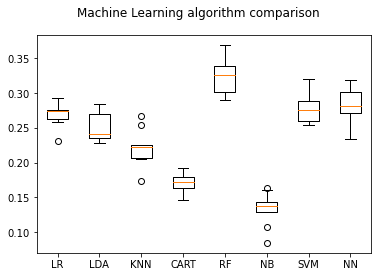

In [64]:
import time 

# 10-fold cross validation
for name, model in models:
    start = time.time()
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    end = time.time()
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(f"Time to Train {end-start}")

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Now let's do this for the top 20 breeds only